In [80]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv("C:\\Users\\ignci\\OneDrive\\Escritorio\\Curso\\Coisigna\\dsb-p2-ml\\ipynbs\datasets\\Madrid air bnb\\listings_detailed.csv")

In [82]:
df["price"]  = df["price"] .apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x)

In [83]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.42
2,23001,https://www.airbnb.com/rooms/23001,20210413152844,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,7,6,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210413152844,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.13
4,26825,https://www.airbnb.com/rooms/26825,20210413152844,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,9.0,9.0,9.0,NaN,f,1,0,1,0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,49185822,https://www.airbnb.com/rooms/49185822,20210413152844,2021-04-15,Habitación con TV con Netflix en Lavapiés,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/59be7fbb-28b3...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19614,49186179,https://www.airbnb.com/rooms/49186179,20210413152844,2021-04-16,Habitación con TV con Netflix en Gaztambide,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/62d916ba-bea9...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19615,49187258,https://www.airbnb.com/rooms/49187258,20210413152844,2021-04-15,Habitación con TV con Netflix en Chamberí,"*facturas incluidas (gas, electricidad, Intern...",NaN,https://a0.muscache.com/pictures/be000599-44d6...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19616,49187471,https://www.airbnb.com/rooms/49187471,20210413152844,2021-04-15,Habitación con TV con Netflix en Goya,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/ffbecf79-945e...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN


## beds

In [5]:
df["beds"].isnull().value_counts()

False    19218
True       400
Name: beds, dtype: int64

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds', ylabel='count'>

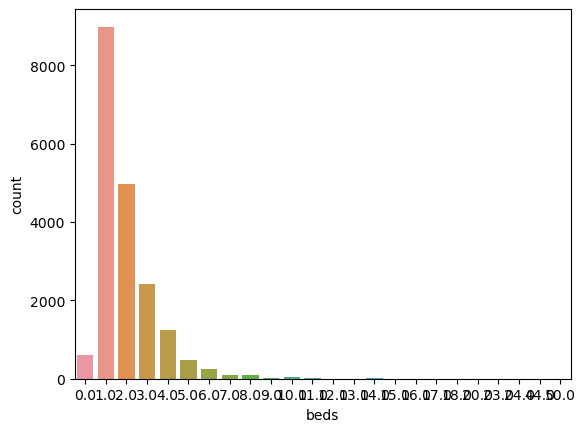

In [6]:
sns.countplot(df["beds"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds'>

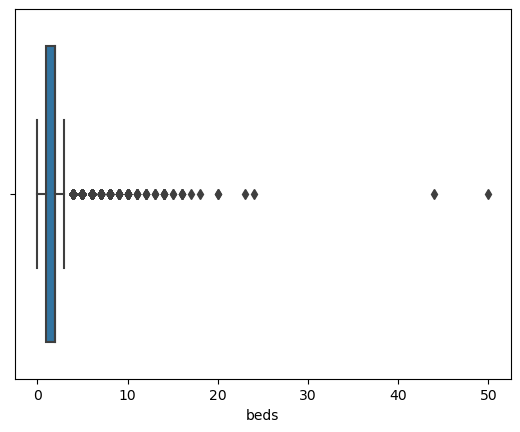

In [7]:
sns.boxplot(df["beds"])

In [8]:
df = df[(df["beds"]<5) &( df["beds"]!= 0)]

In [9]:
df =  df[(df["price"]<1000)]

In [10]:
df.shape

(17361, 74)

In [11]:
df["beds"]

0        1.0
1        1.0
3        1.0
4        1.0
5        4.0
        ... 
19612    2.0
19613    1.0
19614    1.0
19615    1.0
19616    1.0
Name: beds, Length: 17361, dtype: float64

In [12]:
df[df["beds"]<5]["price"]

0        60.0
1        31.0
3        92.0
4        26.0
5        85.0
         ... 
19612    40.0
19613    23.0
19614    21.0
19615    22.0
19616    19.0
Name: price, Length: 17361, dtype: float64

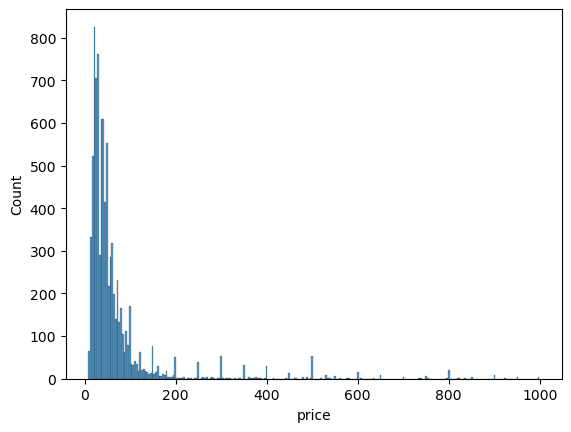

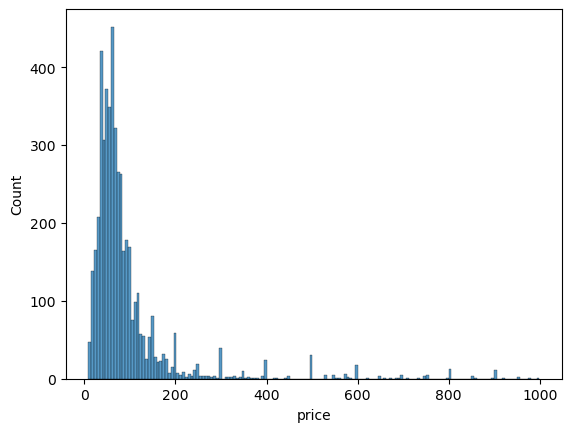

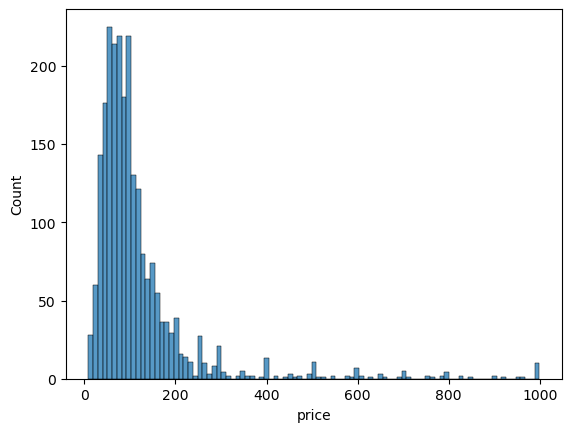

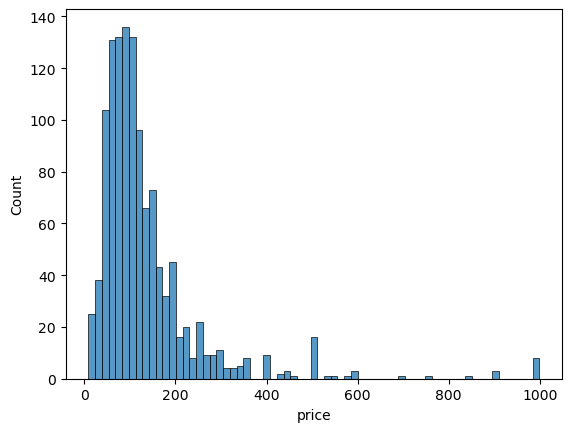

In [13]:
for i in range(1,5):
    sns.histplot(df[df["beds"]==i]["price"])
    plt.show()

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


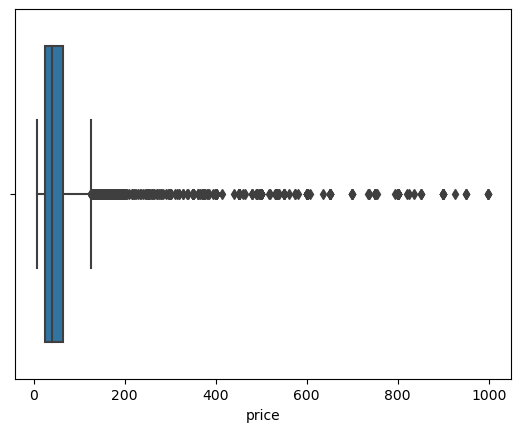

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


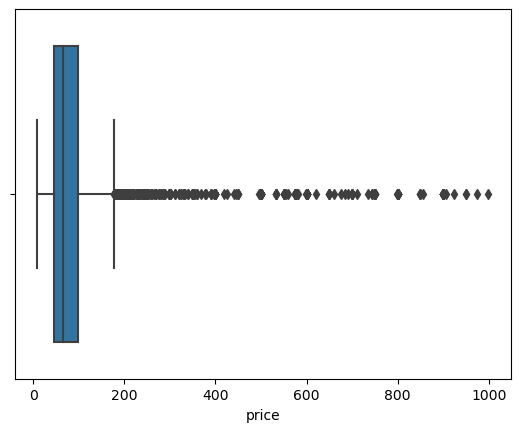

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


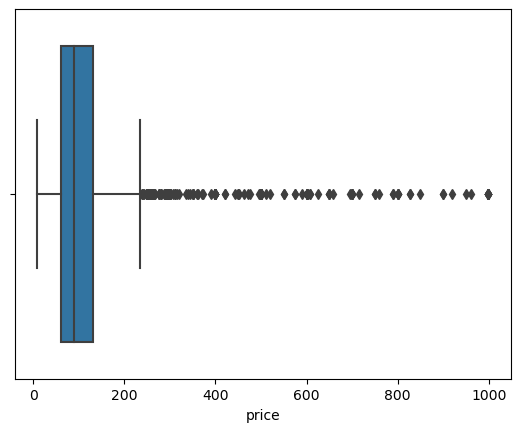

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


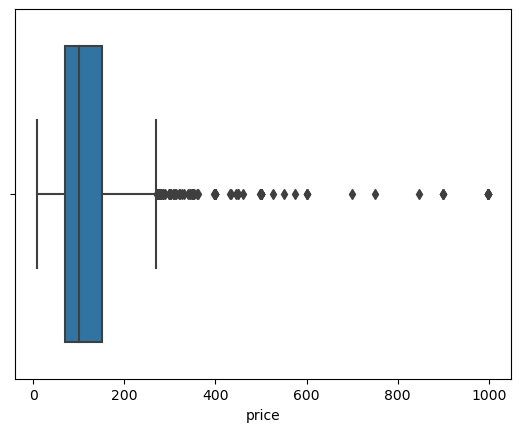

In [14]:
for i in range(1,5):
    sns.boxplot(df[df["beds"]==i]["price"])
    plt.show()

## amenities

In [15]:
df["amenities"]

0        ["Kitchen", "Elevator", "Extra pillows and bla...
1        ["Bed linens", "Refrigerator", "Dishes and sil...
3        ["Refrigerator", "Host greets you", "Dishes an...
4        ["Elevator", "Patio or balcony", "Bed linens",...
5        ["TV with standard cable", "Kitchen", "Elevato...
                               ...                        
19612    ["Kitchen", "Hangers", "Wifi", "Heating", "Coo...
19613    ["Kitchen", "Lock on bedroom door", "Oven", "D...
19614    ["Kitchen", "Wifi", "Cooking basics", "Hot wat...
19615    ["Kitchen", "Toaster", "Oven", "Lock on bedroo...
19616    ["Kitchen", "Toaster", "Lock on bedroom door",...
Name: amenities, Length: 17361, dtype: object

## minimum_nights

In [16]:
df = df[df["minimum_nights"]<8]

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights', ylabel='count'>

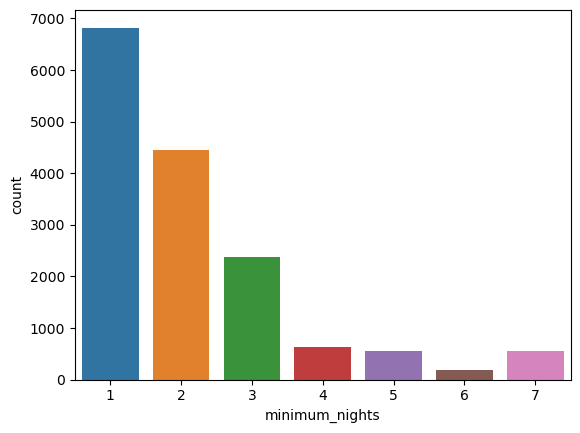

In [17]:
sns.countplot(df["minimum_nights"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ignci\anaconda3\lib\si

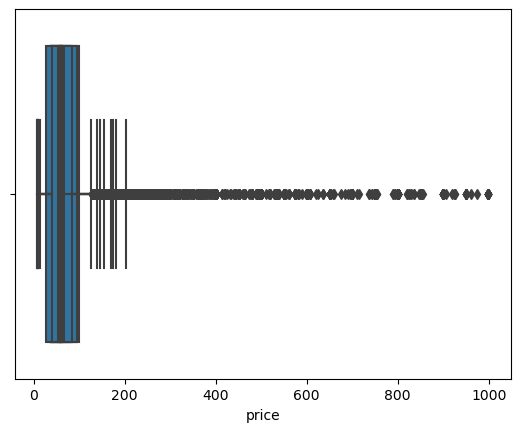

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


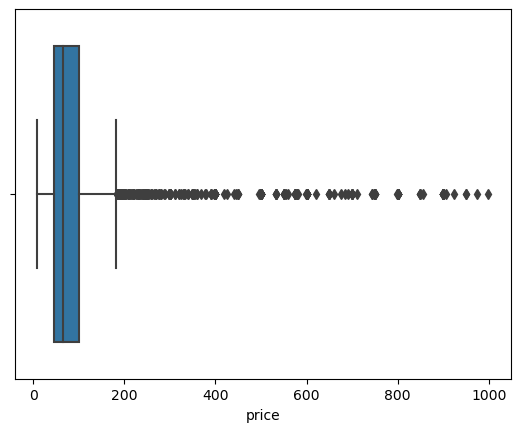

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


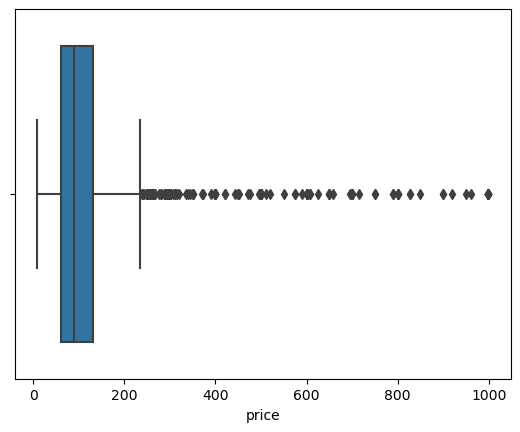

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


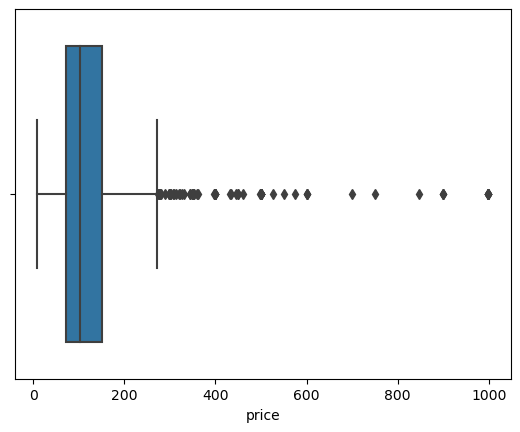

In [18]:
for i in range(1,8):
    sns.boxplot(df[df["minimum_nights"]==i]["price"])
    plt.show
    
for i in range(1,5):
    sns.boxplot(df[df["beds"]==i]["price"])
    plt.show()

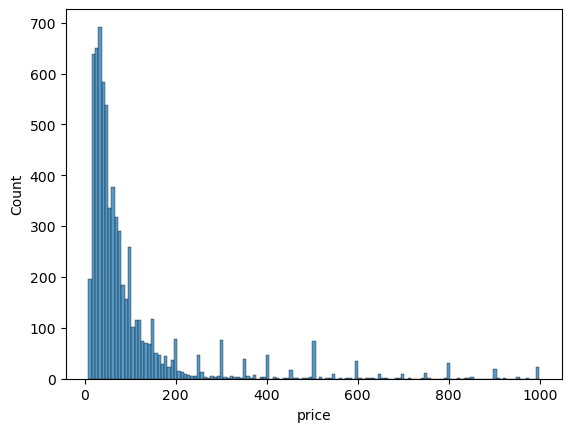

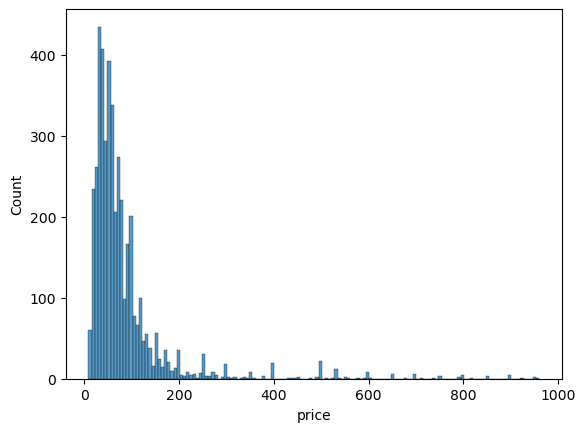

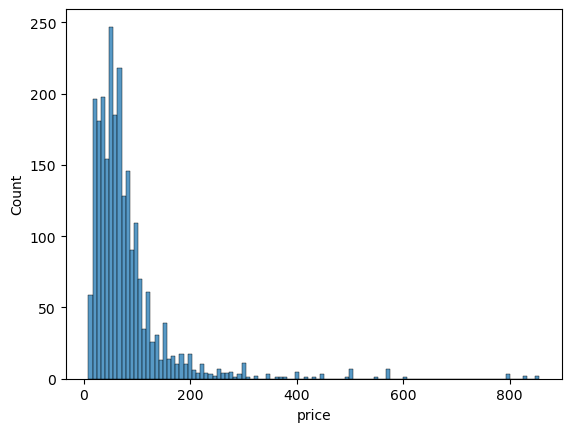

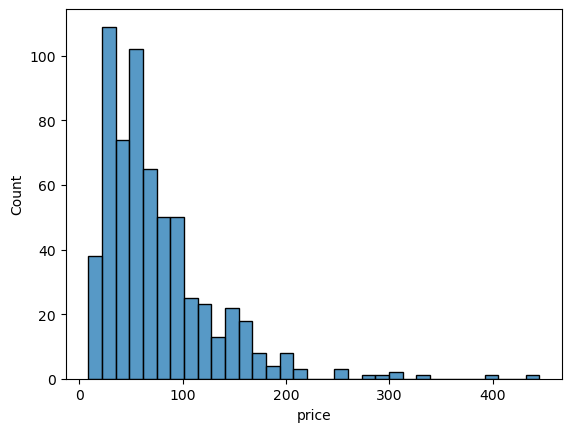

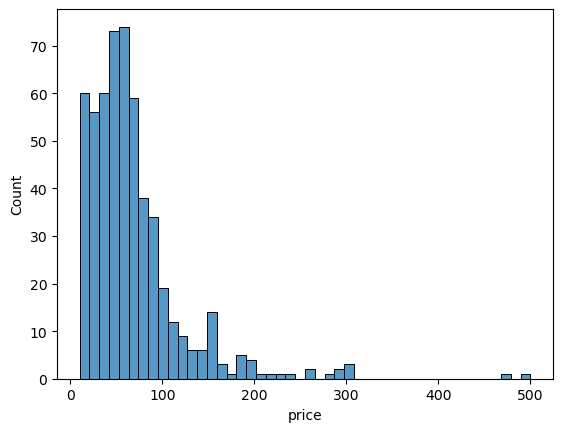

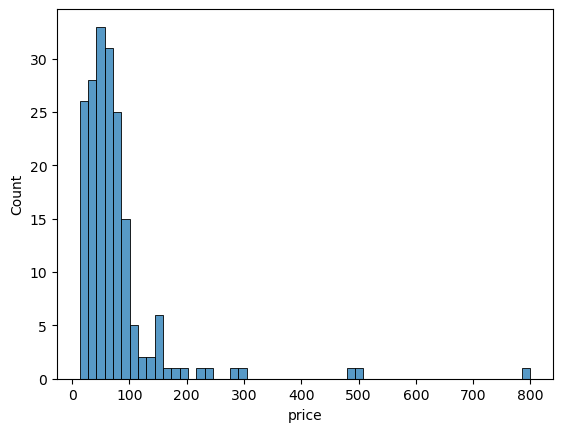

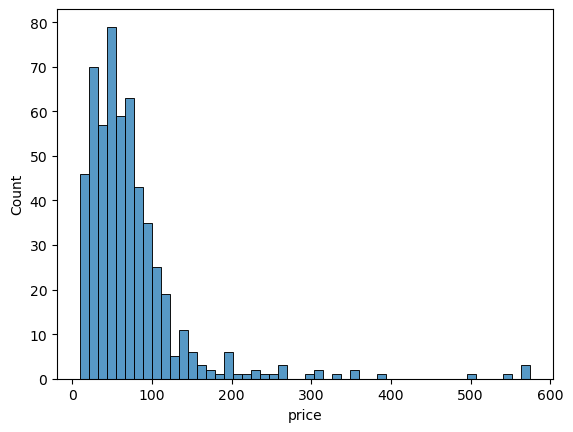

In [19]:
for i in range(1,8):
    sns.histplot(df[df["minimum_nights"]==i]["price"])
    plt.show()

## maximum_nights

In [20]:
df = df[df["maximum_nights"]>500]

In [21]:
df.shape

(9495, 74)

In [22]:
df["maximum_nights"].unique()

array([  1125,    730,    700,   1825,   1000,   1124,    720,   1200,
         1120,    900,    600,   1365,   1123,    999,    888,  11111,
         1100,    740,   1121,    619,    965,   1091, 142365,   1084,
         1024,   1001,   1063,   1118,   1101,   1111,   1115,    750],
      dtype=int64)

In [23]:
df["maximum_nights"].value_counts

<bound method IndexOpsMixin.value_counts of 0        1125
3         730
4        1125
7         730
14       1125
         ... 
19598    1125
19607    1125
19608    1125
19610    1125
19615    1125
Name: maximum_nights, Length: 9495, dtype: int64>

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maximum_nights', ylabel='count'>

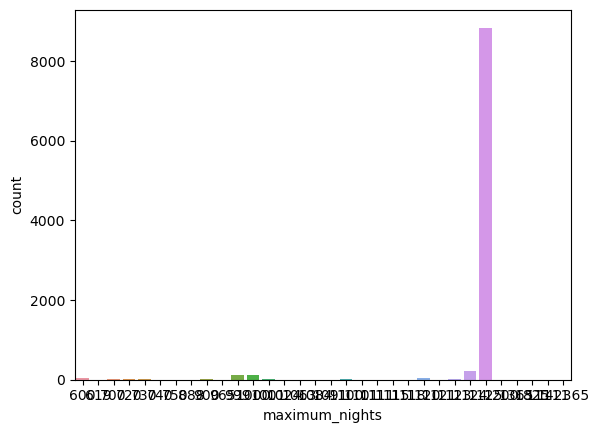

In [24]:
sns.countplot(df["maximum_nights"])

<AxesSubplot:xlabel='maximum_nights', ylabel='Density'>

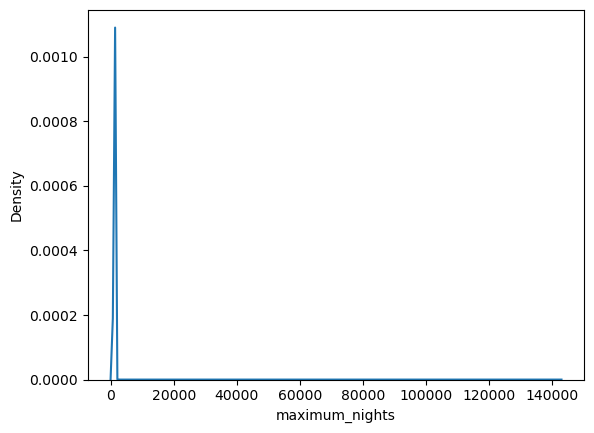

In [25]:
sns.kdeplot(df["maximum_nights"])

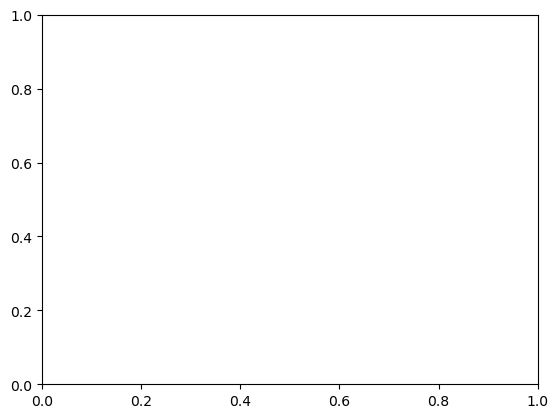

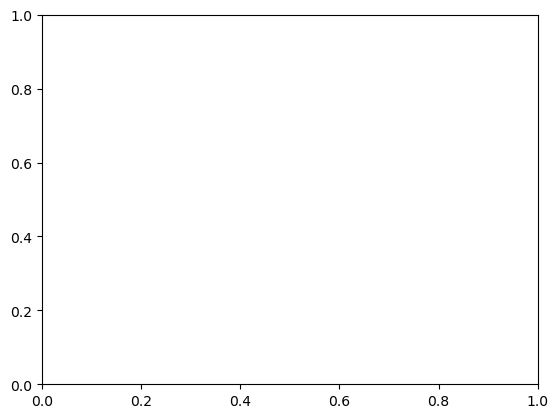

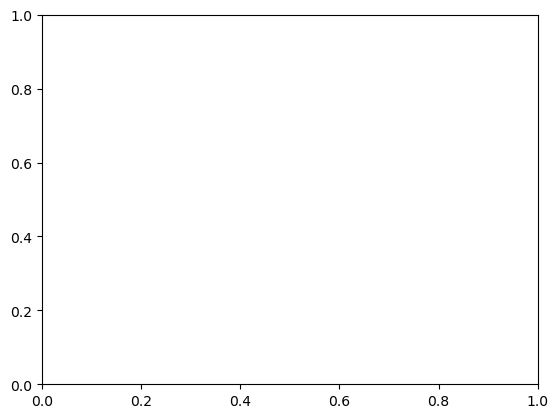

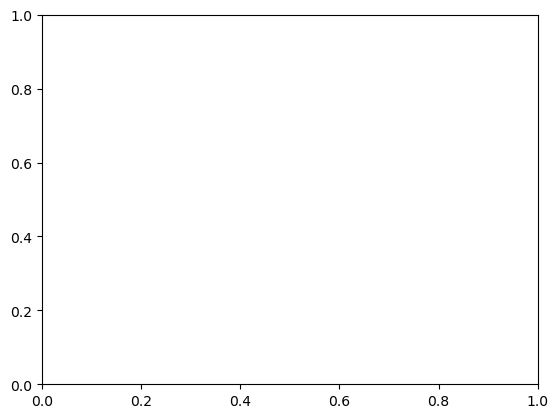

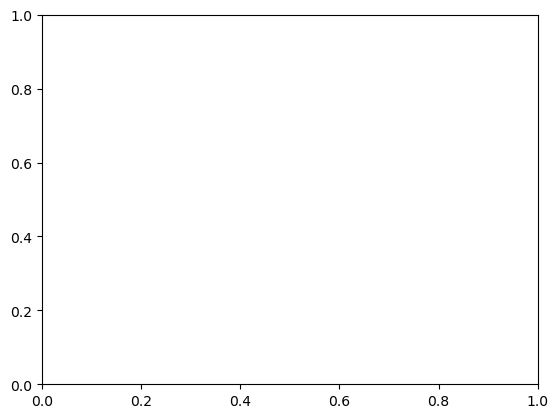

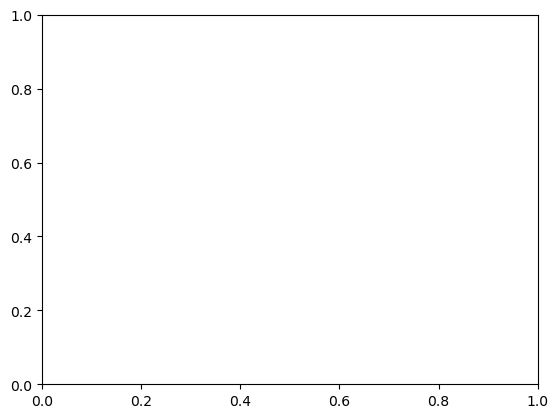

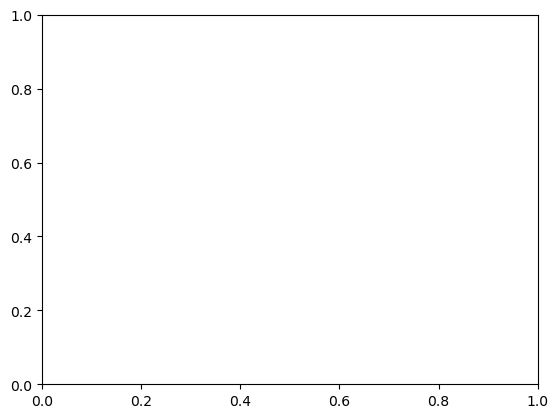

In [26]:
for i in range(1,8):
    sns.histplot(df[df["maximum_nights"]==i]["price"])
    plt.show()

## minimum_minimum_nights

In [27]:
df[["minimum_minimum_nights","minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]

,minimum_minimum_nights,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,1.0,1,1.0,1125.0,1125.0,1.0,1125.0
3,5.0,5,5.0,1125.0,1125.0,5.0,1125.0
4,2.0,2,2.0,1125.0,1125.0,2.0,1125.0
7,3.0,3,3.0,730.0,730.0,3.0,730.0
14,2.0,2,2.0,1125.0,1125.0,2.0,1125.0
...,...,...,...,...,...,...,...
19598,6.0,6,6.0,1125.0,1125.0,6.0,1125.0
19607,6.0,6,6.0,1125.0,1125.0,6.0,1125.0
19608,1.0,1,1.0,1125.0,1125.0,1.0,1125.0
19610,5.0,5,5.0,1125.0,1125.0,5.0,1125.0


In [28]:
df[["availability_30","availability_60", "availability_90" ,"availability_365"]]

,availability_30,availability_60,availability_90,availability_365
0,30,60,90,180
3,12,42,72,72
4,30,60,90,365
7,0,0,0,0
14,29,59,89,364
...,...,...,...,...
19598,0,0,13,288
19607,14,37,67,342
19608,30,60,90,365
19610,29,59,89,364


C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='host_is_superhost', ylabel='count'>

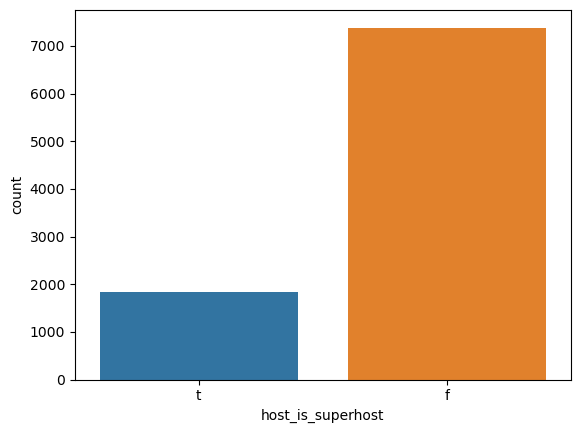

In [29]:
sns.countplot(df["host_is_superhost"])

In [30]:
df["price"]

0        60.0
3        92.0
4        26.0
7        54.0
14       21.0
         ... 
19598    15.0
19607    18.0
19608    38.0
19610    14.0
19615    22.0
Name: price, Length: 9495, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

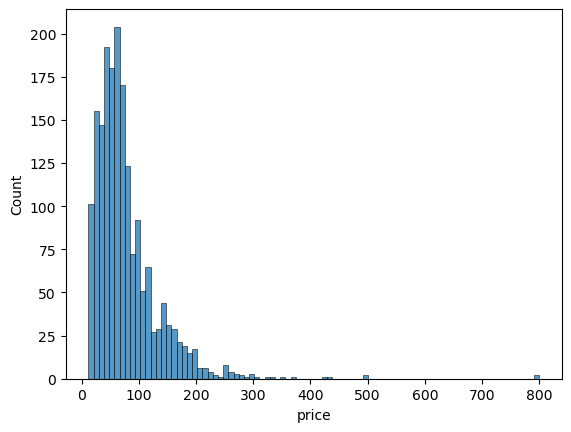

In [31]:
sns.histplot(df[df["host_is_superhost"] == "t"]["price"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

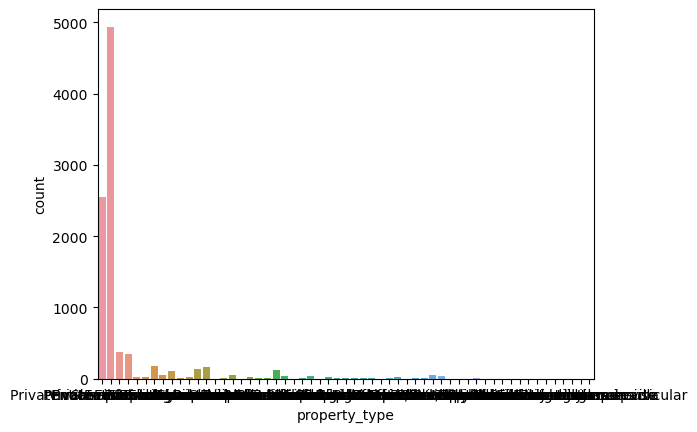

In [32]:
sns.countplot(df["property_type"])

In [33]:
df["property_type"].value_counts()

Entire apartment                      4939
Private room in apartment             2556
Private room in house                  373
Entire loft                            342
Entire condominium                     172
Private room in condominium            169
Entire serviced apartment              137
Private room in hostel                 122
Entire house                           108
Private room in bed and breakfast       59
Room in boutique hotel                  58
Shared room in apartment                53
Room in hotel                           40
Room in hostel                          36
Shared room in house                    34
Private room in townhouse               29
Private room in guest suite             27
Private room in chalet                  22
Private room in loft                    20
Private room in serviced apartment      18
Private room in guesthouse              18
Shared room in hostel                   15
Room in serviced apartment              14
Shared room

In [34]:
len(df["neighbourhood_cleansed"].unique())

126

In [35]:
len(df["neighbourhood_group_cleansed"].unique())

21

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

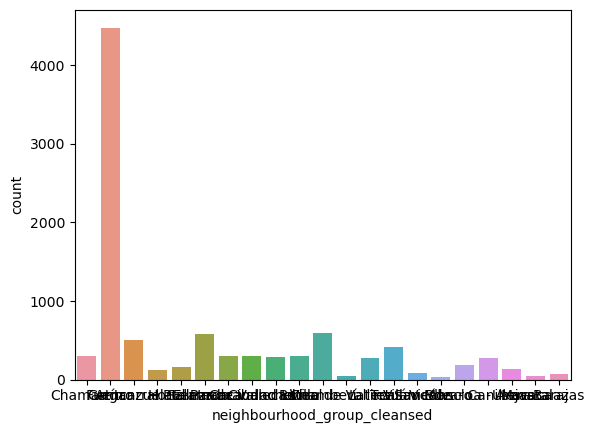

In [36]:
sns.countplot(df["neighbourhood_group_cleansed"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='count'>

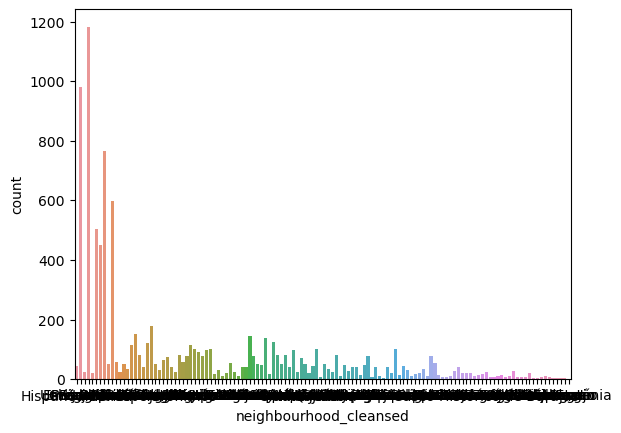

In [37]:
sns.countplot(df["neighbourhood_cleansed"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='count'>

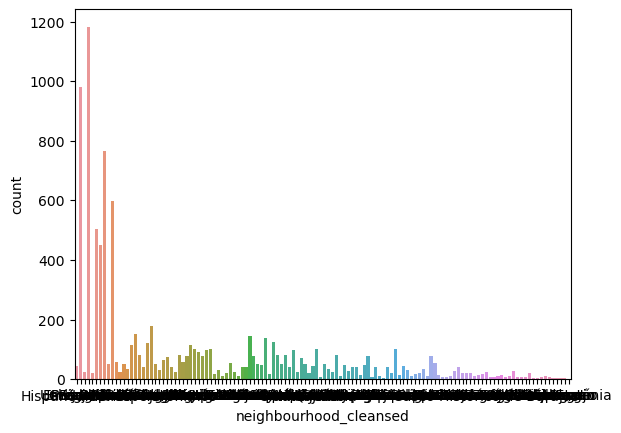

In [38]:
sns.countplot(df["neighbourhood_cleansed"])

In [39]:
df = df[df["price"]<700]

<AxesSubplot:xlabel='price', ylabel='Count'>

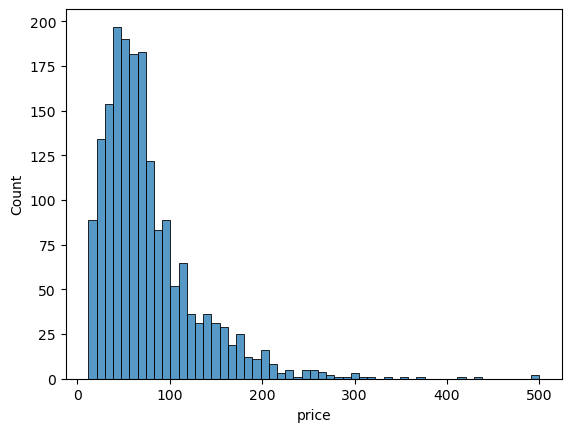

In [45]:
sns.histplot(df[df["host_is_superhost"] == "t"]["price"])

<AxesSubplot:xlabel='price', ylabel='Count'>

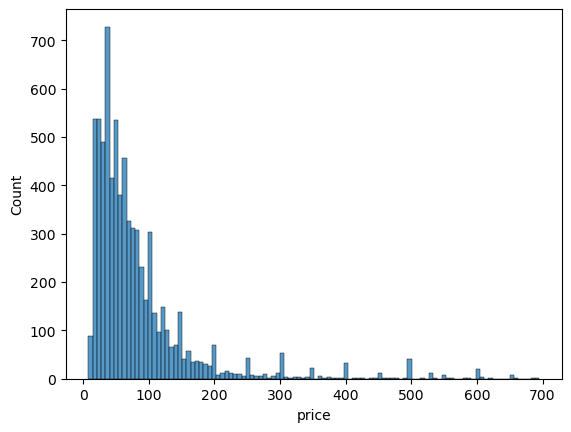

In [46]:
sns.histplot(df[df["host_is_superhost"] == "f"]["price"])

## number_of_reviews

In [57]:
df["number_of_reviews"].isnull().value_counts()

False    19618
Name: number_of_reviews, dtype: int64

In [58]:
df["number_of_reviews"].value_counts()

0      5637
1      1860
2      1044
3       767
4       577
       ... 
393       1
434       1
517       1
523       1
356       1
Name: number_of_reviews, Length: 435, dtype: int64

In [63]:
df = df[df["number_of_reviews"]<200]

In [104]:
df = df[df["price"]<700]

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_reviews', ylabel='count'>

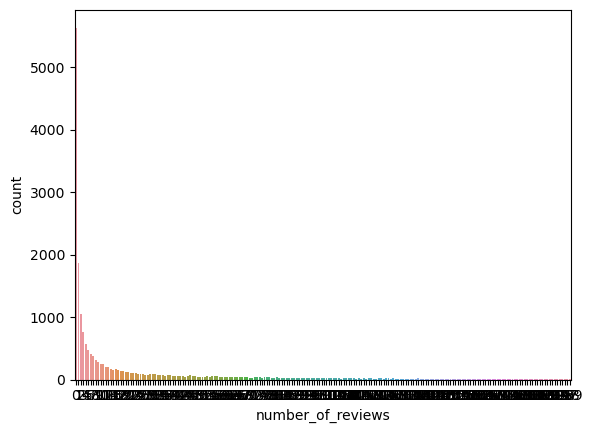

In [64]:
sns.countplot(df["number_of_reviews"])

<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

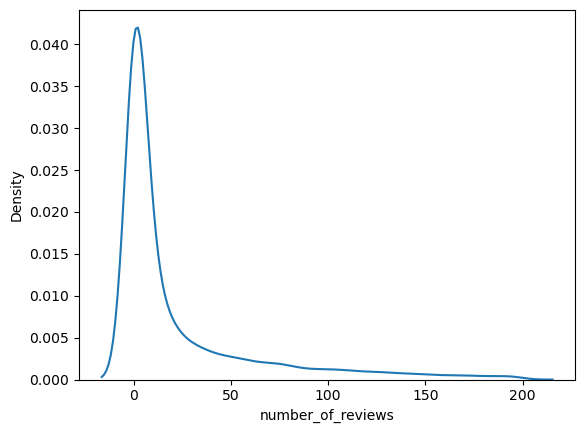

In [65]:
sns.kdeplot(df["number_of_reviews"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


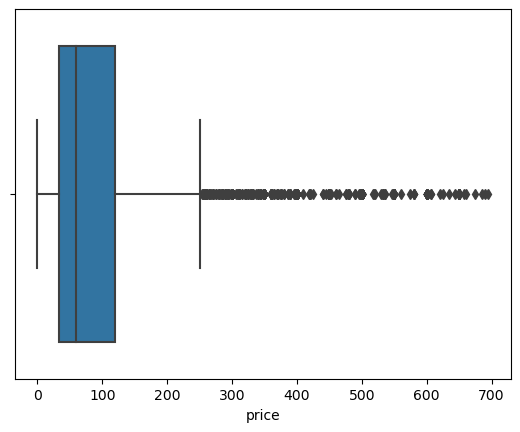

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


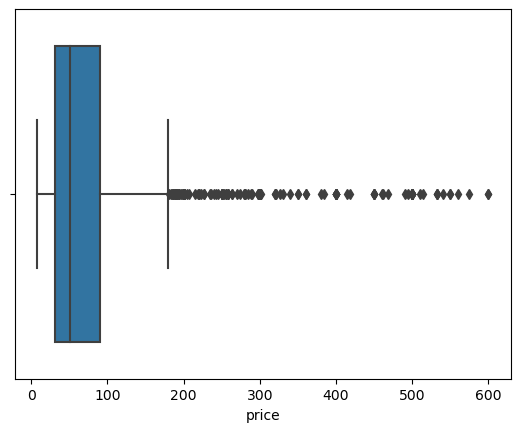

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


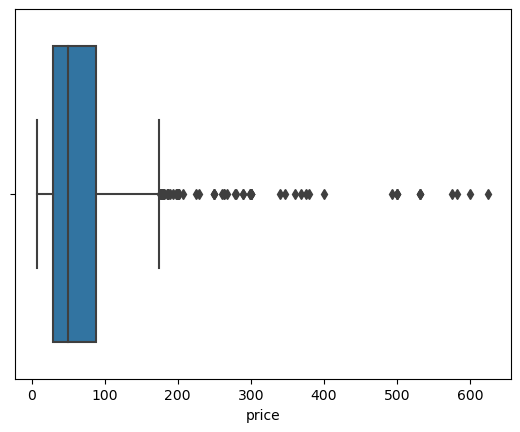

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


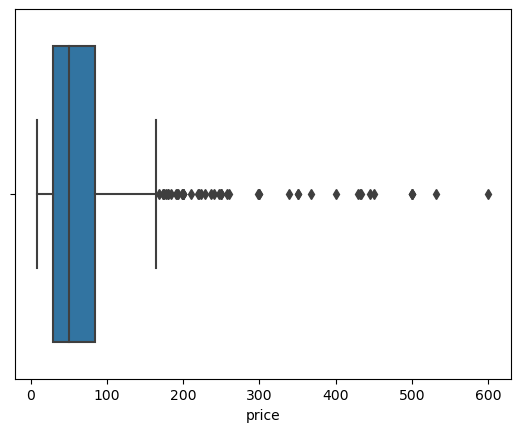

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


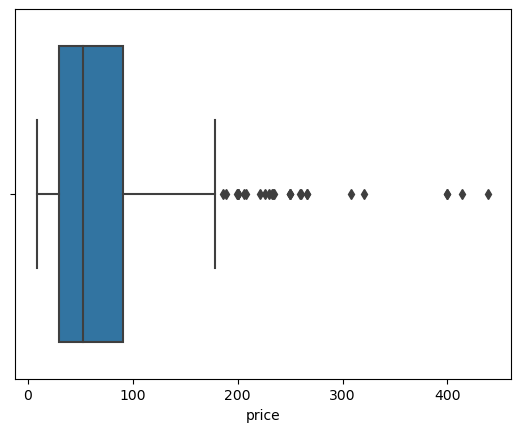

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


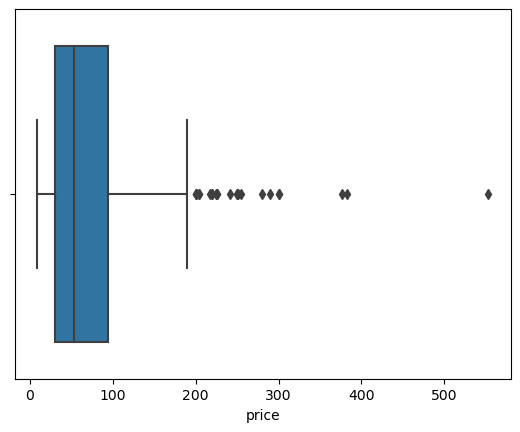

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


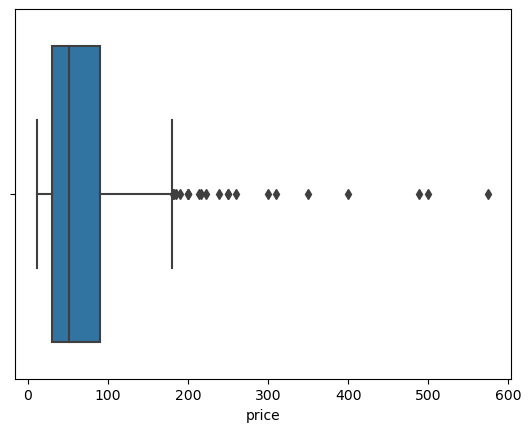

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


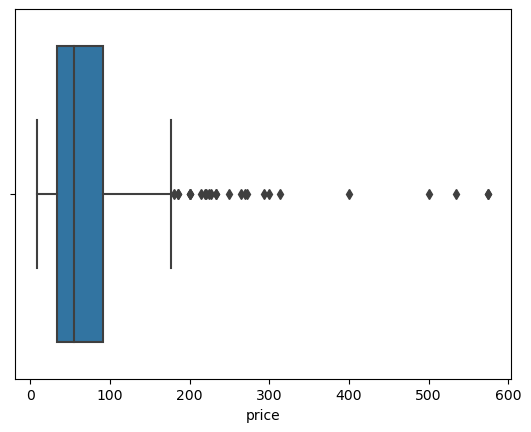

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


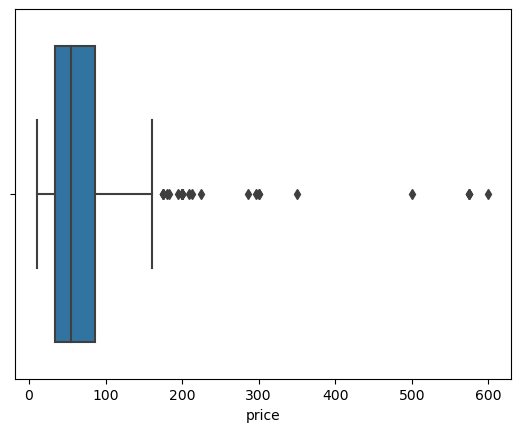

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


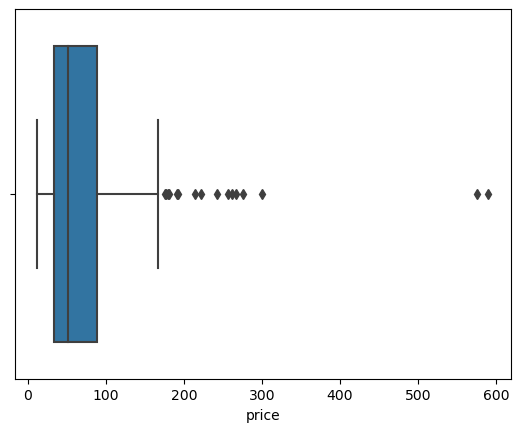

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


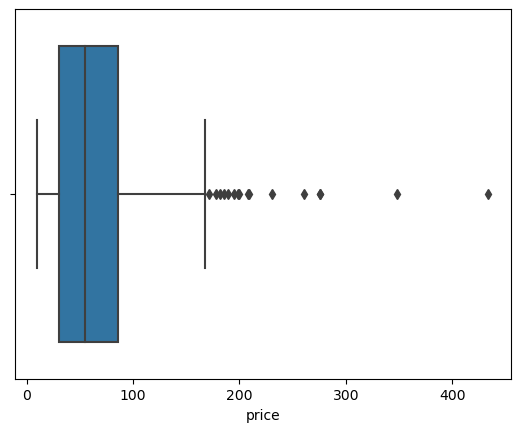

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


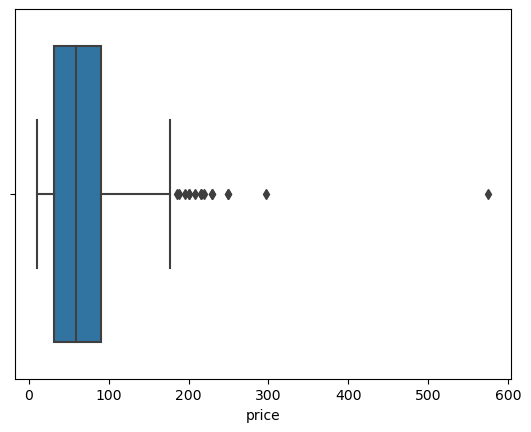

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


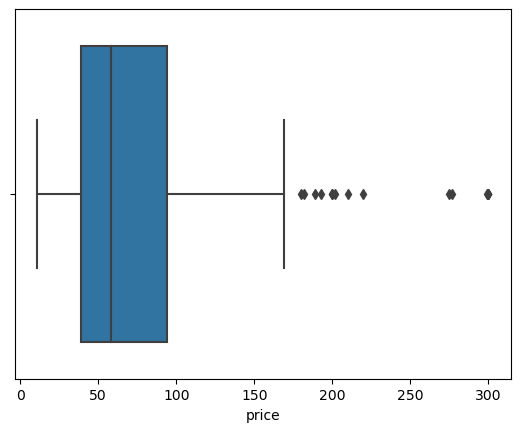

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


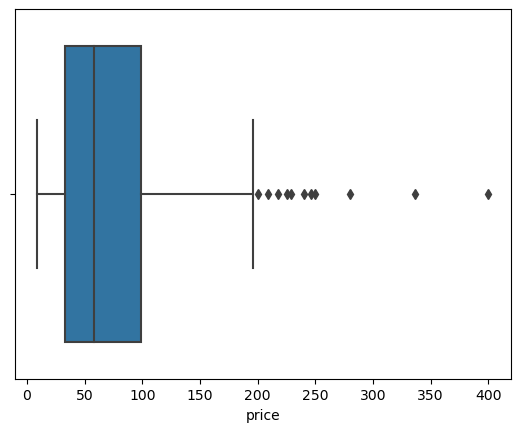

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


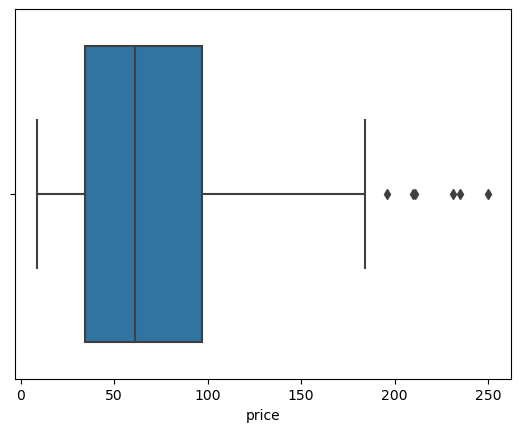

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


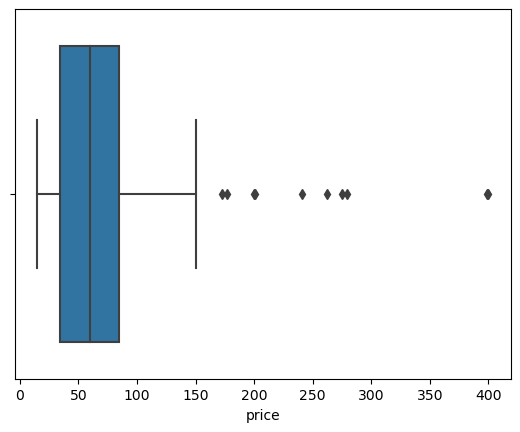

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


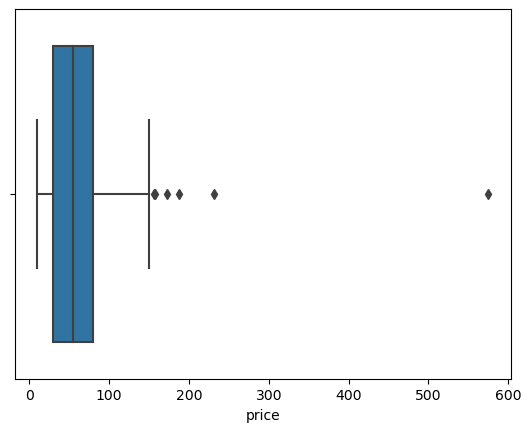

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


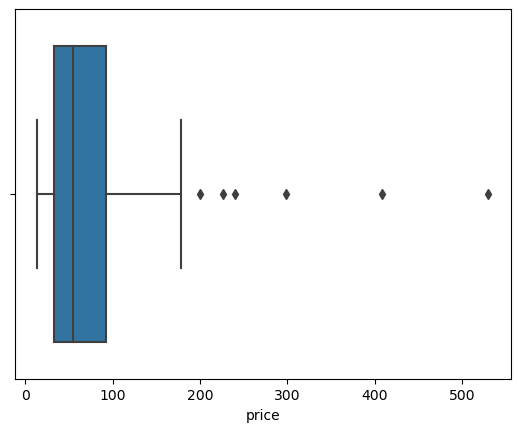

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


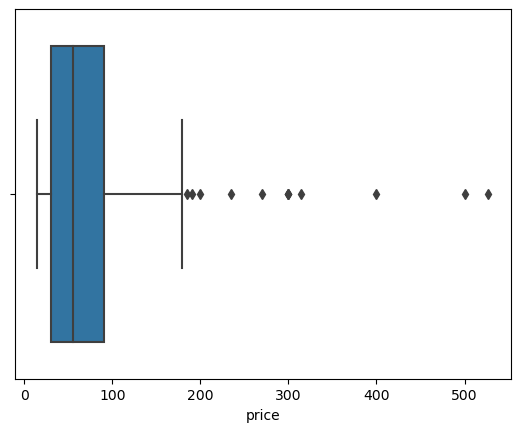

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


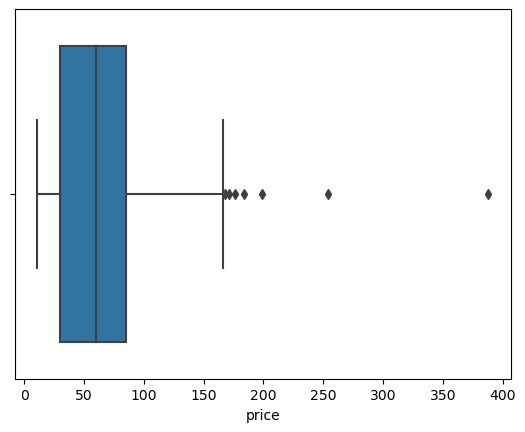

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


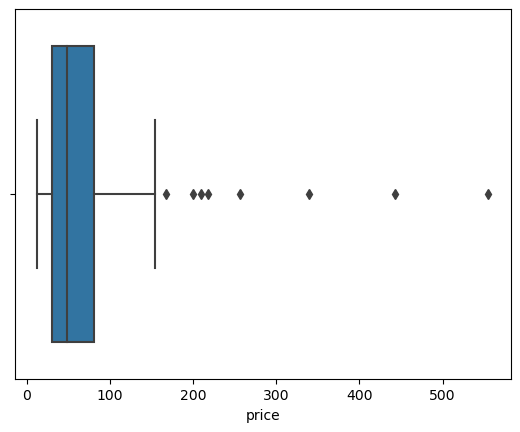

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


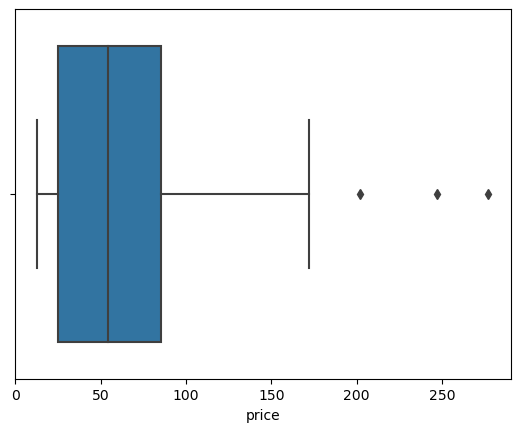

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


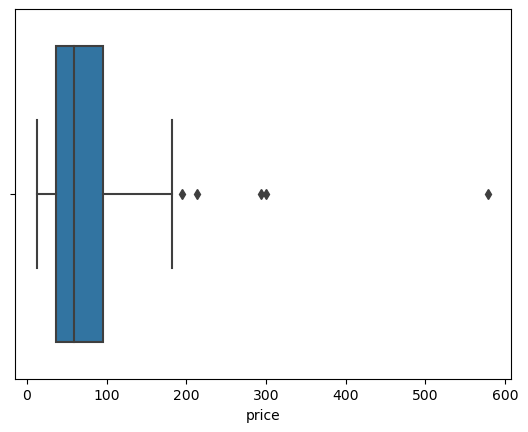

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


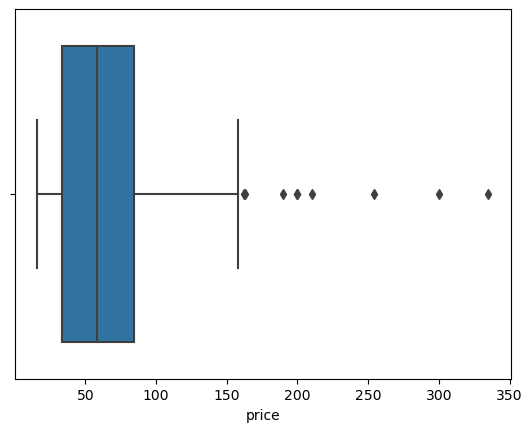

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


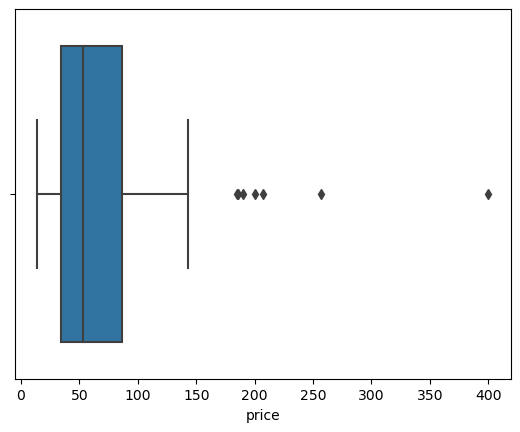

In [69]:
for i in range(0,25):
    sns.boxplot(df[df["number_of_reviews"]==i]["price"])
    plt.show()

In [72]:
df_price_per_number_of_reviews = df.groupby(["number_of_reviews"]).mean().price

In [73]:
df_price_per_number_of_reviews

number_of_reviews
0      107.120593
1       79.105638
2       73.973710
3       70.844828
4       71.784965
          ...    
195     56.363636
196     56.200000
197     49.833333
198     44.666667
199     51.444444
Name: price, Length: 200, dtype: float64

In [74]:
df_price_per_number_of_reviews.sort_values(ascending=False)

number_of_reviews
157    201.333333
102    116.419355
95     114.315789
111    113.600000
144    111.454545
          ...    
105     46.000000
192     44.700000
198     44.666667
186     44.285714
191     35.166667
Name: price, Length: 200, dtype: float64

Text(0, 0.5, 'Price')

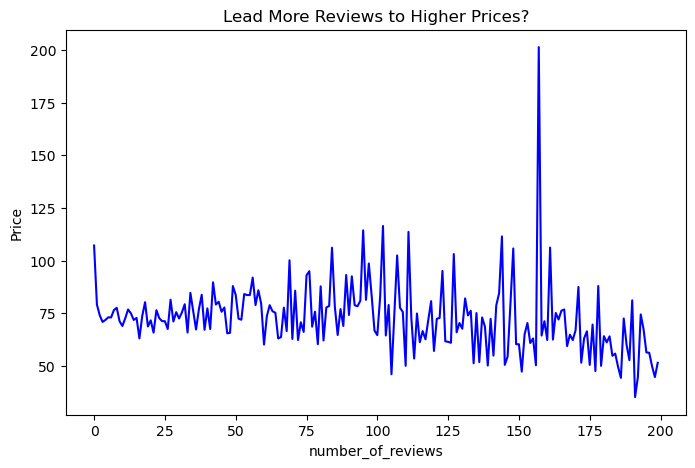

In [76]:
plt.figure(figsize=(8,5))
df_price_per_number_of_reviews.plot(kind="line", color="blue")
plt.title("Lead More Reviews to Higher Prices?")
plt.ylabel("Price")

# Last review

In [84]:
df["last_review"].isnull().value_counts()

False    13981
True      5637
Name: last_review, dtype: int64

# Instant bookable


In [87]:
df["instant_bookable"].value_counts()

f    9956
t    9662
Name: instant_bookable, dtype: int64

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='instant_bookable', ylabel='count'>

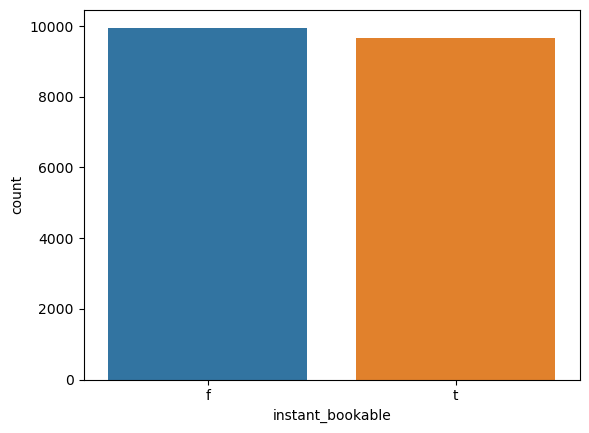

In [88]:
sns.countplot(df["instant_bookable"])

In [99]:
df_instant_boockable = df.groupby(["instant_bookable"]).mean().price

Text(0, 0.5, 'Price')

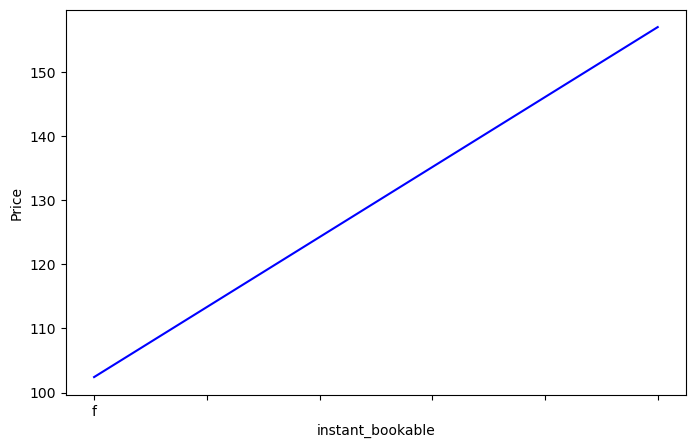

In [96]:
plt.figure(figsize=(8,5))
df_instant_boockable.plot(kind="line", color="blue")
plt.ylabel("Price")

In [101]:
df_instant_boockable

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
instant_bookable,,,,,,,,,,,,,,,,,,,,,
f,2.657689e+07,2.021041e+13,1.147645e+08,5.593094,5.593094,40.421867,-3.693881,2.924267,NaN,1.416496,...,9.387709,9.710549,9.709423,9.642656,9.261432,6.571916,4.794596,1.682503,0.089393,0.923376
t,3.174456e+07,2.021041e+13,1.481691e+08,18.812593,18.812593,40.420074,-3.694204,3.301697,NaN,1.466253,...,9.287881,9.573790,9.572729,9.673544,9.086317,13.997723,11.748913,1.830884,0.252432,1.343287


C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


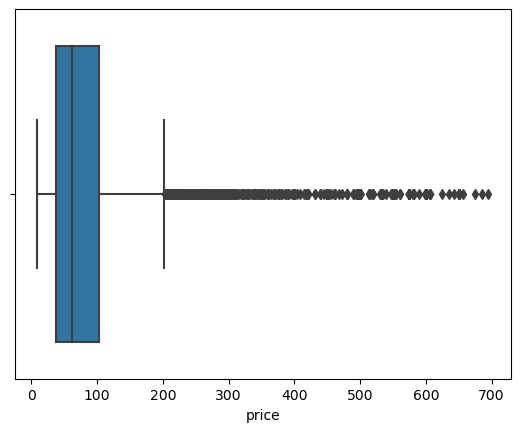

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


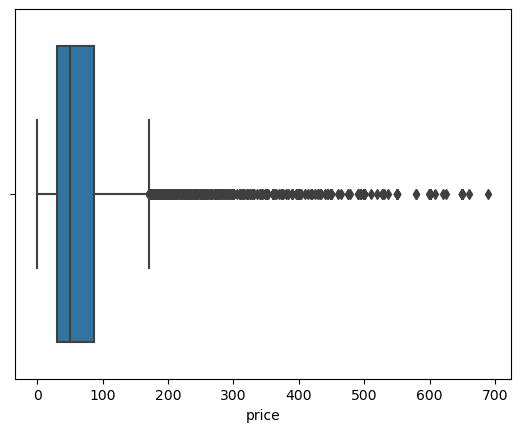

In [105]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.boxplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

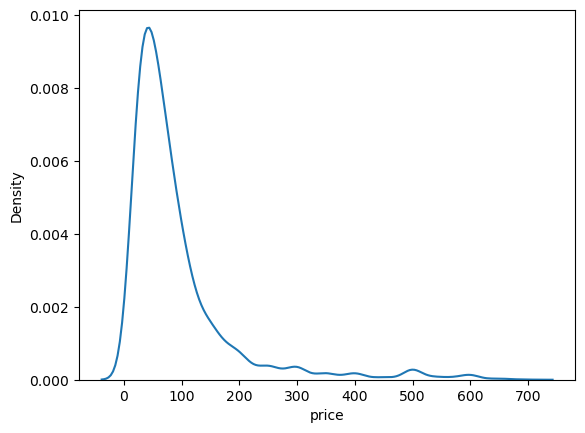

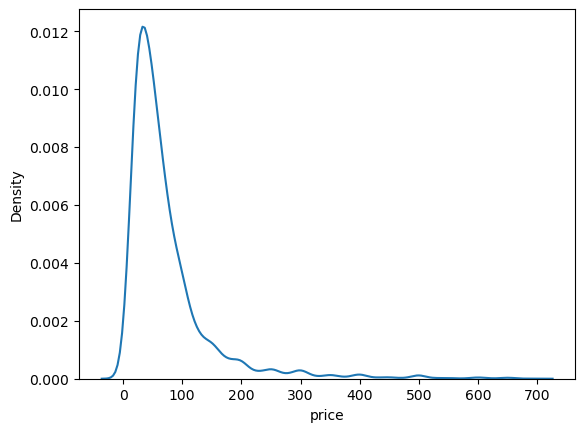

In [106]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.kdeplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

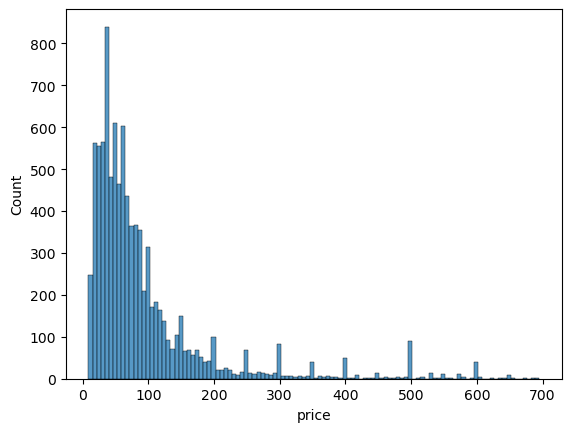

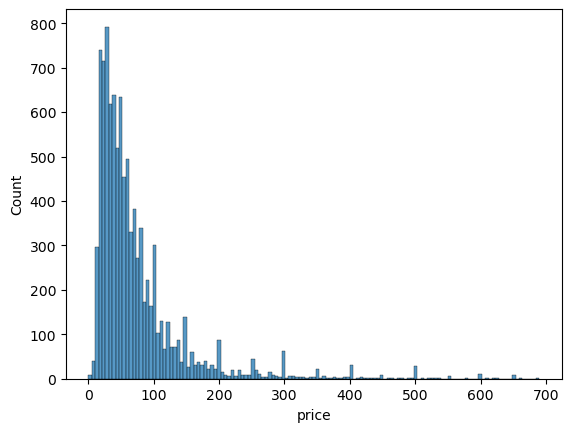

In [107]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.histplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

# calculated_host_listings_count

In [110]:
sorted(df["calculated_host_listings_count"].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 36,
 38,
 40,
 43,
 45,
 48,
 53,
 59,
 62,
 66,
 67,
 69,
 72,
 88,
 92,
 101,
 113,
 163]

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='count'>

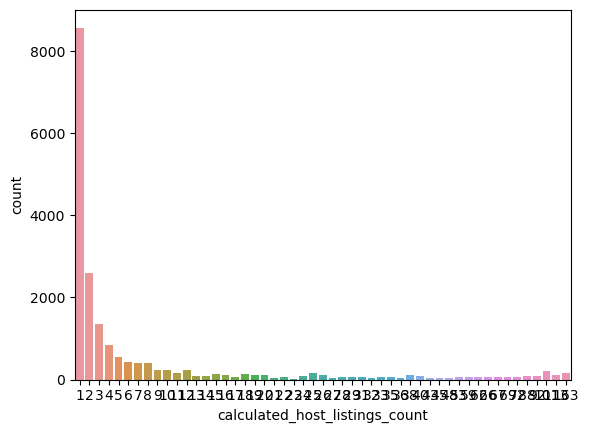

In [111]:
sns.countplot(df["calculated_host_listings_count"])

In [112]:
df_calculated_host_listings_count = df.groupby("calculated_host_listings_count").mean().price

Text(0, 0.5, 'Price')

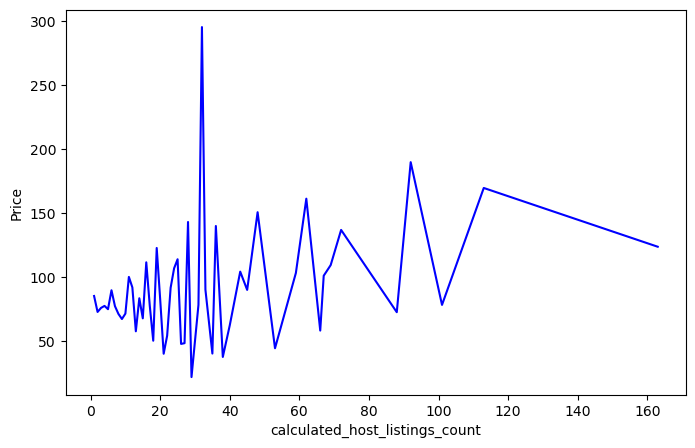

In [113]:
plt.figure(figsize=(8,5))
df_calculated_host_listings_count.plot(kind="line", color="blue")
plt.ylabel("Price")

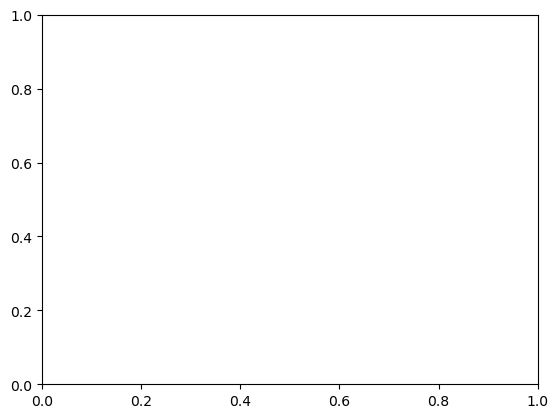

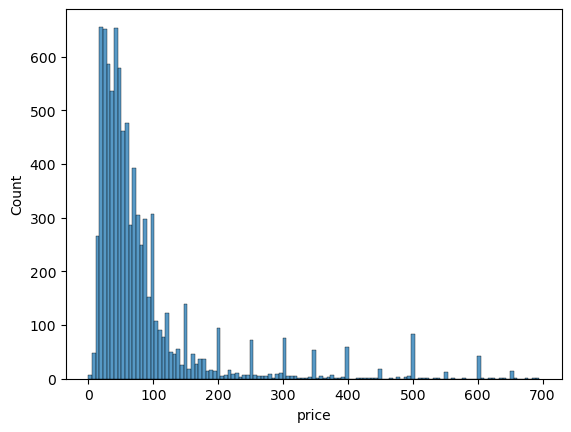

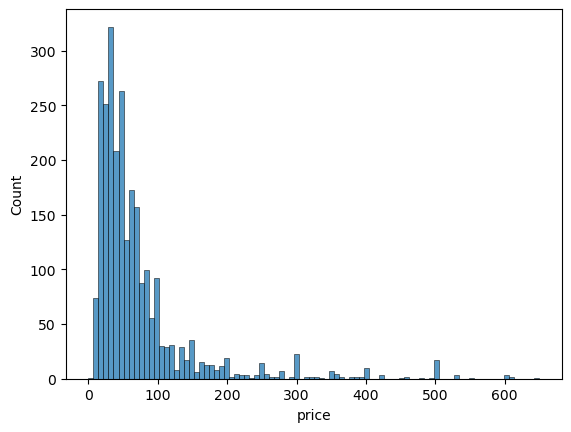

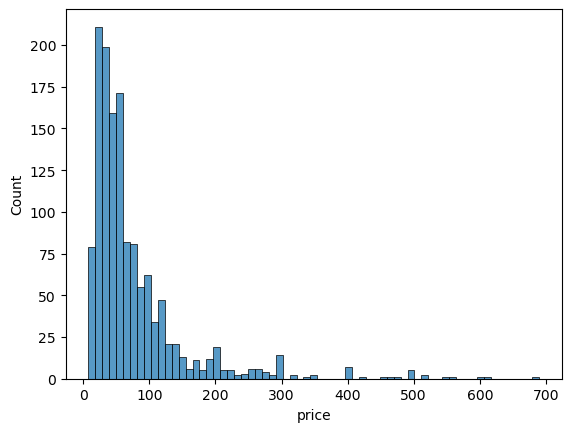

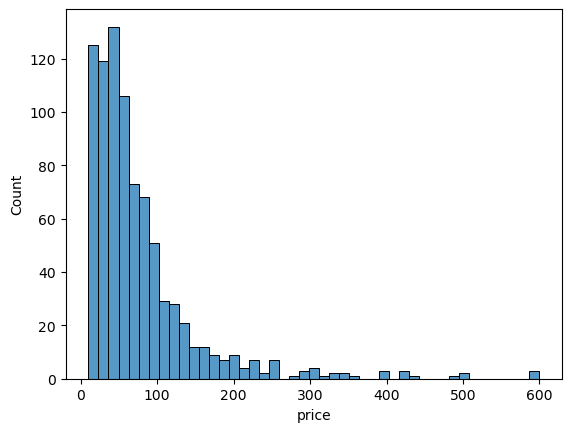

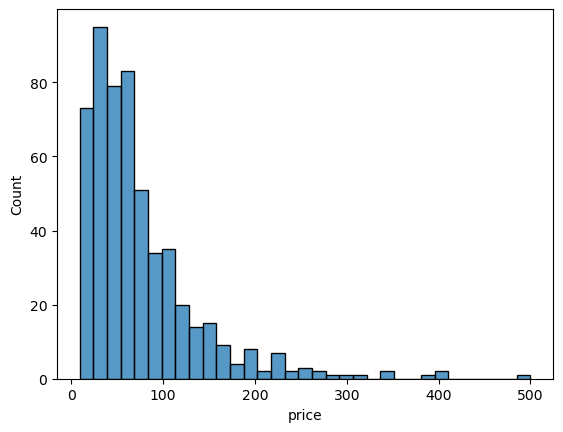

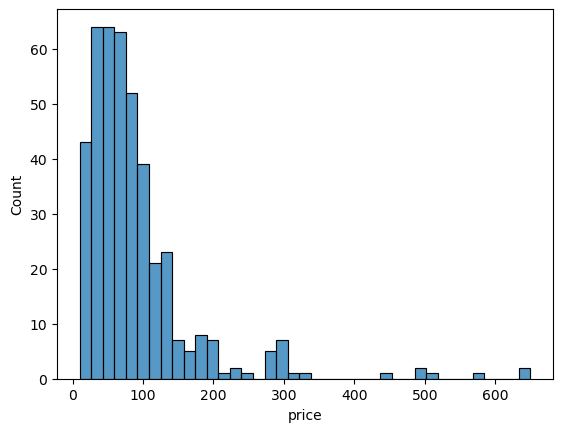

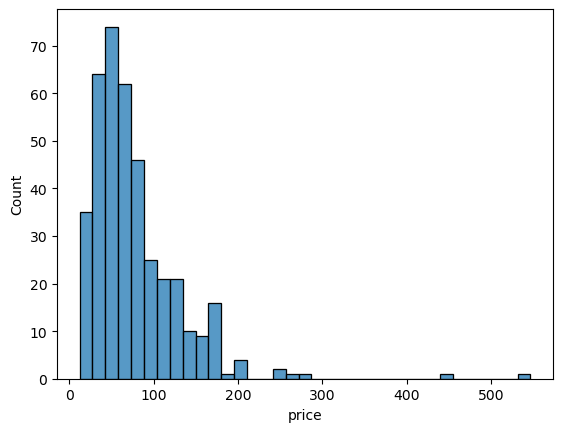

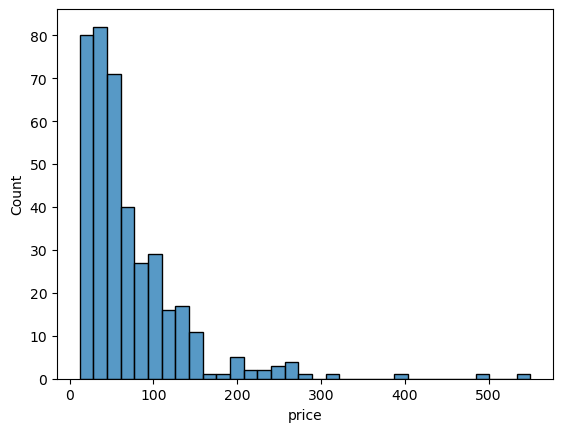

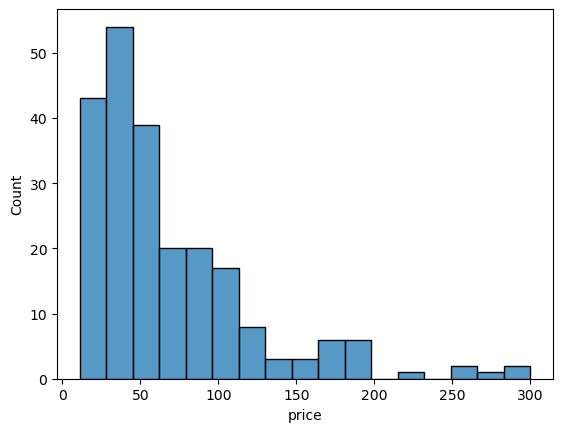

In [114]:
for i in range(10):
    sns.histplot(df[df["calculated_host_listings_count"]==i]["price"])
    plt.show()

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


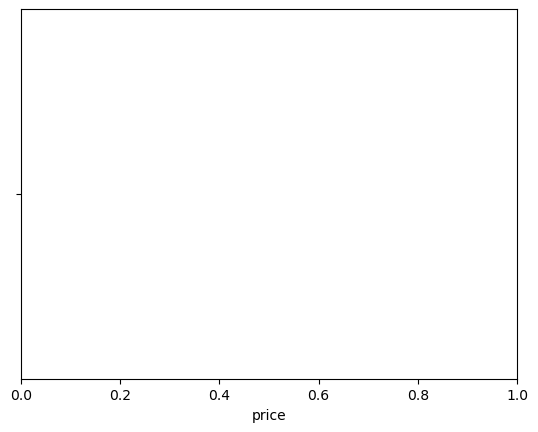

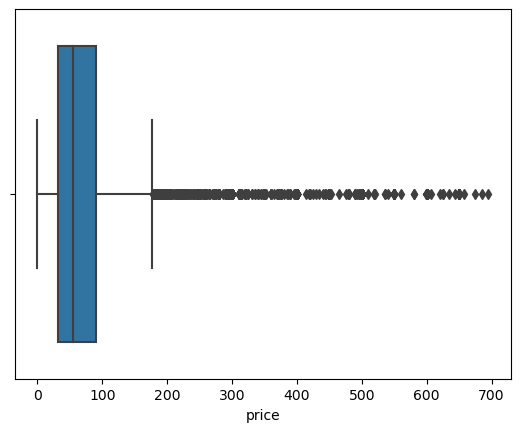

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


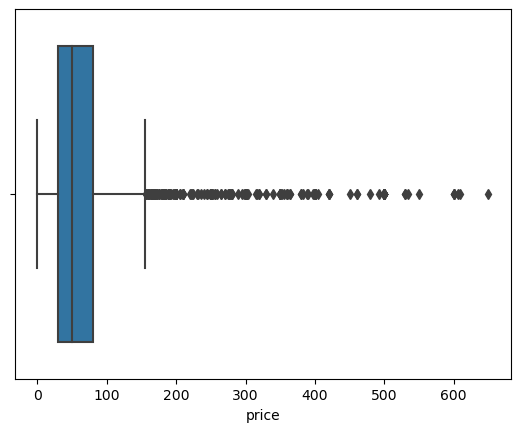

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


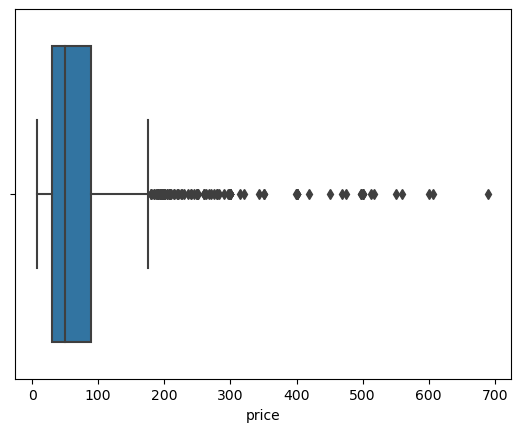

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


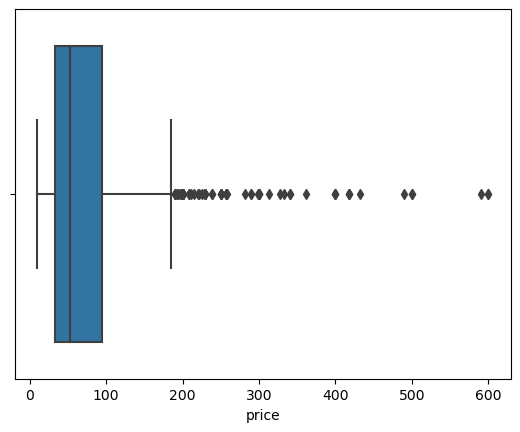

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


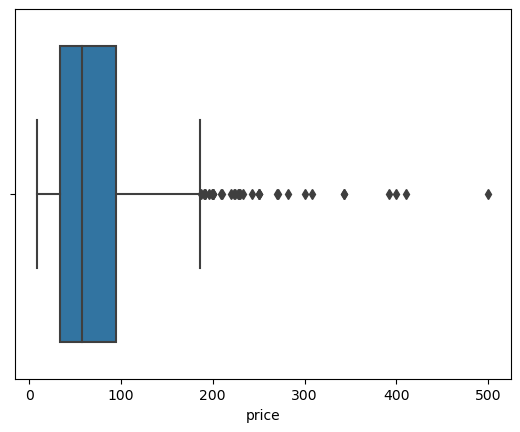

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


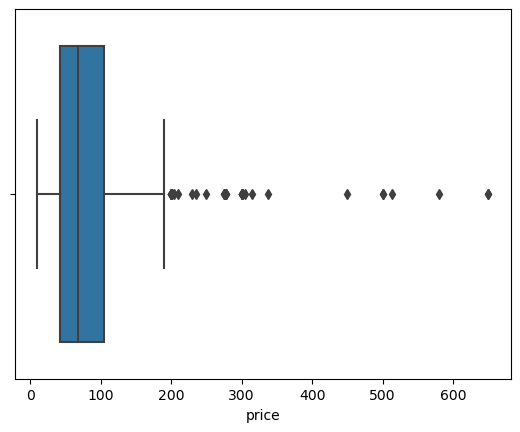

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


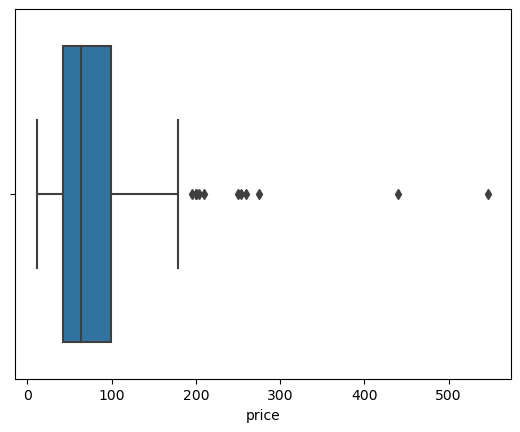

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


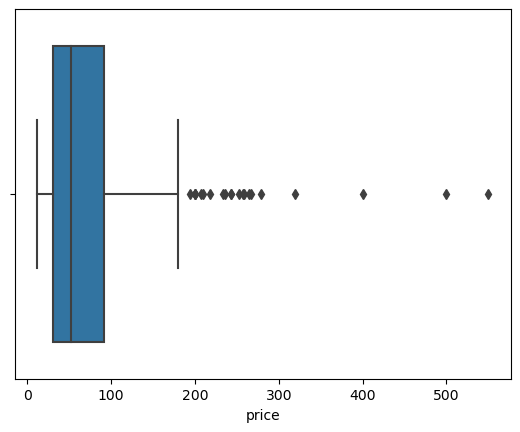

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


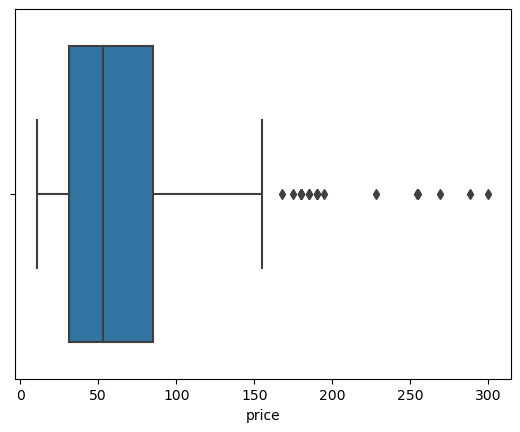

In [118]:
for i in range(10):
    sns.boxplot(df[df["calculated_host_listings_count"]==i]["price"])
    plt.show()

In [117]:
df_calculated_host_listings_count

calculated_host_listings_count
1       85.134445
2       72.654307
3       75.827586
4       77.386792
5       74.811009
6       89.619952
7       77.175127
8       71.116162
9       67.142222
10      71.347280
11     100.045455
12      91.837838
13      57.538462
14      83.346939
15      67.666667
16     111.446429
17      77.647059
18      50.180556
19     122.657895
20      82.383333
21      40.000000
22      54.121212
23      91.565217
24     106.778947
25     113.846667
26      47.673077
27      48.259259
28     142.964286
29      21.758621
31      78.209677
32     295.281250
33      90.075758
35      40.142857
36     139.833333
38      37.500000
40      62.250000
43     104.162791
45      89.888889
48     150.604167
53      44.283019
59     103.135593
62     161.177419
66      58.106061
67     100.970149
69     109.260870
72     136.760563
88      72.465909
92     189.706522
101     78.168317
113    169.549550
163    123.625767
Name: price, dtype: float64

# reviews_per_month

In [120]:
df["reviews_per_month"].isnull().value_counts()

False    13825
True      5332
Name: reviews_per_month, dtype: int64

In [122]:
df["reviews_per_month"].unique()

array([5.800e-01, 4.200e-01,       nan, 1.300e-01, 1.120e+00, 3.000e-02,
       1.290e+00, 1.100e-01, 9.100e-01, 3.800e-01, 4.400e-01, 1.500e-01,
       2.210e+00, 4.600e-01, 3.300e-01, 1.000e-01, 8.700e-01, 5.100e-01,
       8.900e-01, 1.530e+00, 1.280e+00, 1.750e+00, 7.600e-01, 5.310e+00,
       6.400e-01, 5.000e-02, 6.800e-01, 1.900e-01, 1.570e+00, 9.800e-01,
       6.700e-01, 1.680e+00, 1.840e+00, 4.460e+00, 8.600e-01, 6.000e-01,
       8.200e-01, 7.000e-02, 2.200e-01, 1.650e+00, 9.000e-02, 5.200e-01,
       9.300e-01, 2.460e+00, 3.500e-01, 1.270e+00, 4.500e-01, 2.330e+00,
       8.000e-02, 1.660e+00, 1.060e+00, 1.810e+00, 1.600e+00, 1.300e+00,
       3.000e-01, 4.250e+00, 1.320e+00, 3.200e-01, 1.240e+00, 4.220e+00,
       1.050e+00, 3.400e-01, 1.900e+00, 4.900e-01, 6.500e-01, 1.020e+00,
       4.700e-01, 1.030e+00, 2.770e+00, 1.890e+00, 2.500e-01, 5.900e-01,
       1.400e+00, 4.000e-01, 9.600e-01, 1.130e+00, 1.440e+00, 2.000e-02,
       1.510e+00, 1.070e+00, 4.000e-02, 2.800e-01, 

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reviews_per_month', ylabel='count'>

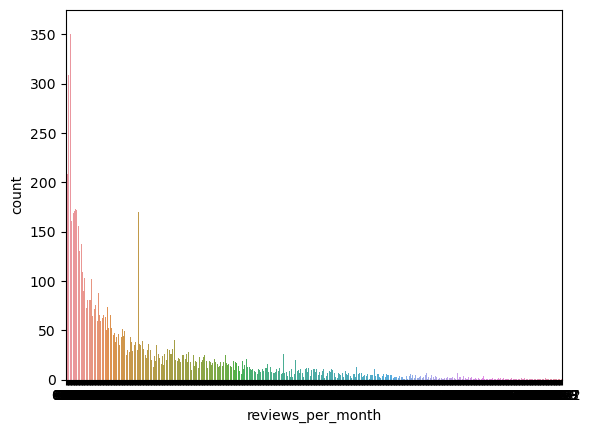

In [121]:
sns.countplot(df["reviews_per_month"])

In [123]:
df_reviews_per_month = df.groupby("reviews_per_month").mean().price

In [124]:
df_reviews_per_month

reviews_per_month
0.01      77.309524
0.02      69.354962
0.03      74.100478
0.04     119.909385
0.05      76.896797
            ...    
10.39     34.000000
10.48     39.000000
11.20     33.000000
11.67     33.000000
16.22     21.000000
Name: price, Length: 682, dtype: float64

Text(0, 0.5, 'Price')

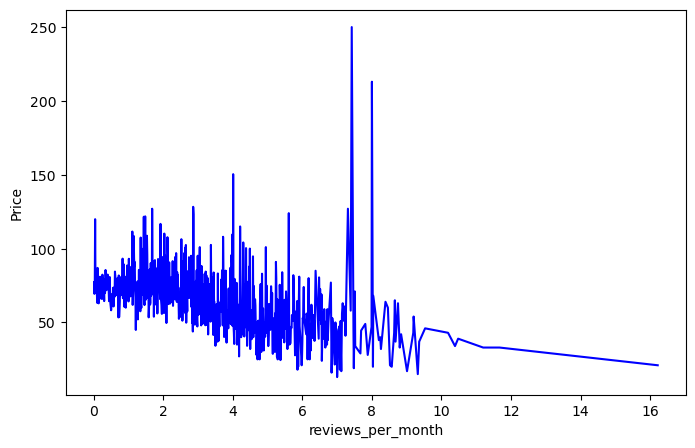

In [126]:
plt.figure(figsize=(8,5))
df_reviews_per_month.plot(kind="line", color="blue")
plt.ylabel("Price")

In [131]:
df_reviews_per_month.index

Float64Index([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
                0.1,
              ...
                9.2,  9.32,  9.36,  9.53, 10.19, 10.39, 10.48,  11.2, 11.67,
              16.22],
             dtype='float64', name='reviews_per_month', length=682)

<AxesSubplot:xlabel='reviews_per_month'>

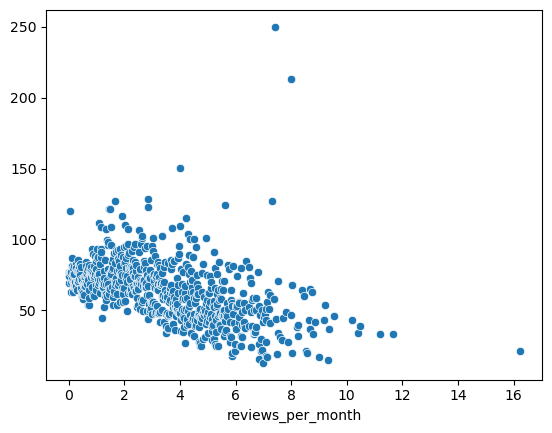

In [132]:
sns.scatterplot(x=df_reviews_per_month.index, y = df_reviews_per_month.values)

# host_id 

In [134]:
df["host_id"]

0            13660
1            83531
2            82175
3        346366726
4           114340
           ...    
19613    172011610
19614    172011610
19615    172011610
19616    172011610
19617    172011610
Name: host_id, Length: 19157, dtype: int64

In [141]:
df_host_id = df.groupby("host_id").mean().price

In [146]:
df_host_id.sort_values()

host_id
312021837      0.0
310825661      0.0
312813621      0.0
371638561      0.0
314090026      0.0
             ...  
14255673     650.0
222853120    657.0
20485449     675.0
19426672     685.0
75694171     695.0
Name: price, Length: 11025, dtype: float64

In [145]:
sns.scatterplot(x=df_host_id.index, y = df_host_id.values)

AttributeError: 'function' object has no attribute 'index'

Text(0, 0.5, 'Price')

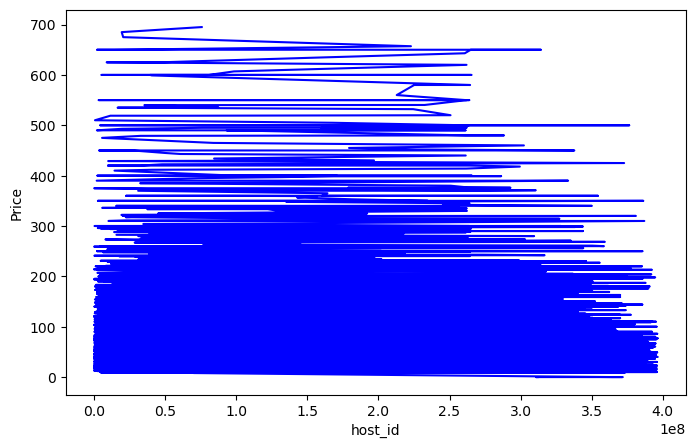

In [150]:
plt.figure(figsize=(8,5))
df_host_id.sort_values().plot(kind="line", color="blue")
plt.ylabel("Price")

In [152]:
df_host_id.sort_values

<bound method Series.sort_values of host_id
7952         259.0
13660         60.0
17453        194.0
31622         22.5
50106         21.0
             ...  
395936662     30.0
396035770     49.0
396081730     86.0
396354701     77.0
396428081     40.0
Name: price, Length: 11025, dtype: float64>